# Load image and observe with ehtim code

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import ehtim as eh
from   ehtim.calibrating import self_cal as sc

In [29]:
im = eh.image.load_txt('../models/avery_sgra_eofn.txt')
eht = eh.array.load_txt('../arrays/EHT2017.txt')

Loading text image:  ../models/avery_sgra_eofn.txt


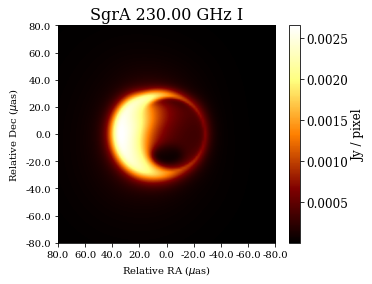

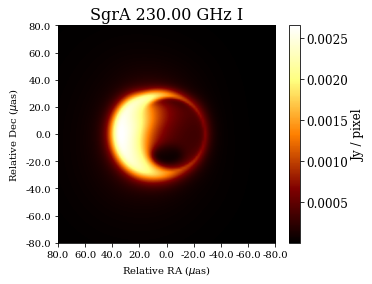

In [30]:
im.display()

In [48]:
tint_sec = 5
tadv_sec = 600
tstart_hr = 0
tstop_hr = 24
bw_hz = 4e9
im_new = im.copy()
print(im.ra)
print(im.dec)
im_new.ra = 12.0
im_new.dec = 12.0

obs = im.observe(eht, tint_sec, tadv_sec, tstart_hr, tstop_hr, bw_hz,
                 ttype='direct', sgrscat=False, ampcal=True, phasecal=True, add_th_noise=False)
obs_new = im_new.observe(eht, tint_sec, tadv_sec, tstart_hr, tstop_hr, bw_hz,
                 ttype='direct', sgrscat=False, ampcal=True, phasecal=True, add_th_noise=False)

17.761122472222223
-28.992189444444445
Generating empty observation file . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Generating empty observation file . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 


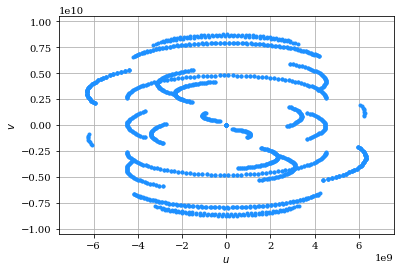

In [49]:
obs.plotall('u','v', conj=True)

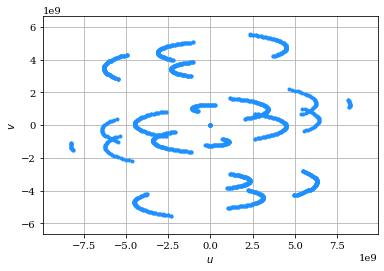

In [50]:
obs_new.plotall('u','v', conj=True)

In [40]:
obs.data['time']

array([ 0.        ,  0.        ,  0.        , ..., 23.83333333,
       23.83333333, 23.83333333])

In [41]:
obs.data['t1']

array(['SMA', 'SMA', 'SPT', ..., 'SMA', 'SMA', 'SPT'], dtype='<U32')

In [42]:
obs.data['t2']

array(['JCMT', 'SPT', 'JCMT', ..., 'JCMT', 'SPT', 'JCMT'], dtype='<U32')

In [43]:
obs.data['vis']

array([2.48843275+8.72207752e-05j, 0.13549345+6.36089353e-02j,
       0.13549218-6.36085526e-02j, ..., 2.48843275+9.04814067e-05j,
       0.13564115+6.28638961e-02j, 0.13563994-6.28634188e-02j])

In [44]:
obs.data['sigma']

array([0.02178442, 0.01988636, 0.02200559, ..., 0.02178442, 0.01988636,
       0.02200559])

In [45]:
obs.data['u']

array([ 6.74976576e+04,  3.90651510e+09, -3.90644760e+09, ...,
        7.01530523e+04,  3.84025474e+09, -3.84018459e+09])

In [46]:
obs.data['v']

array([-7.72548391e+04,  6.89547526e+09, -6.89555252e+09, ...,
       -7.63691032e+04,  6.94532311e+09, -6.94539948e+09])

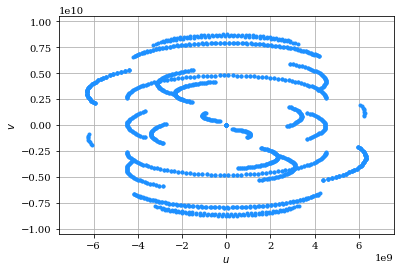

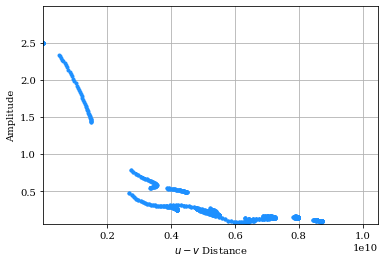

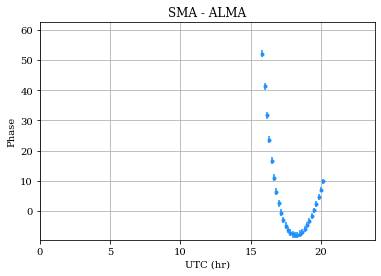

In [37]:
obs.plotall('u','v', conj=True)
obs.plotall('uvdist','amp') 
obs.plot_bl('SMA','ALMA','phase') 

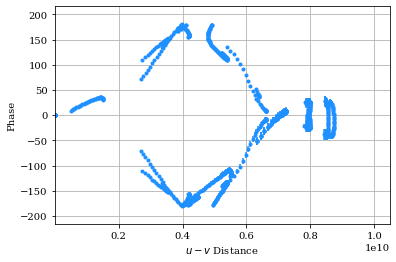

In [38]:
obs.plotall('uvdist','phase') 

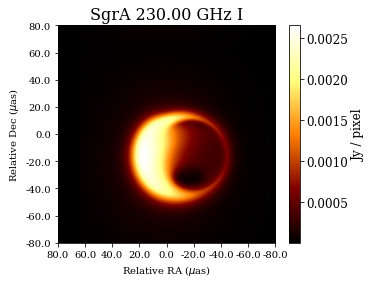

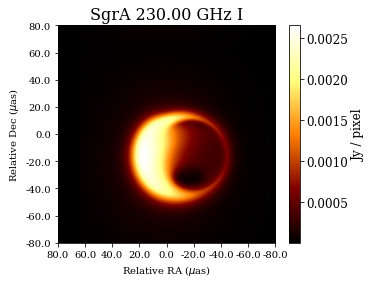

In [27]:
shifted_im = im.shift([10, 10])
shifted_im.display()

In [28]:
tint_sec = 5
tadv_sec = 600
tstart_hr = 0
tstop_hr = 24
bw_hz = 4e9
obs = shifted_im.observe(eht, tint_sec, tadv_sec, tstart_hr, tstop_hr, bw_hz,
                 ttype='fast', sgrscat=False, ampcal=True, phasecal=False)

Generating empty observation file . . . 
Producing clean visibilities from image with fast FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
   Applying atmospheric phase corruption: phasecal-->False
Adding thermal noise to data . . . 


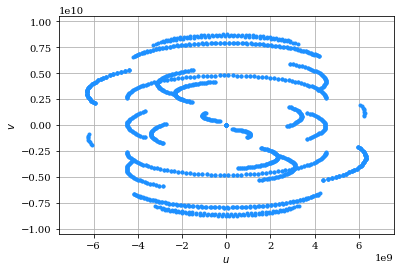

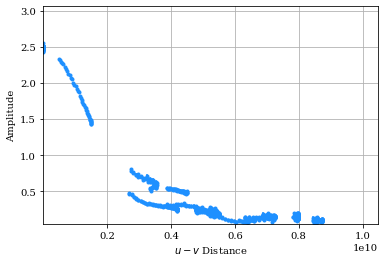

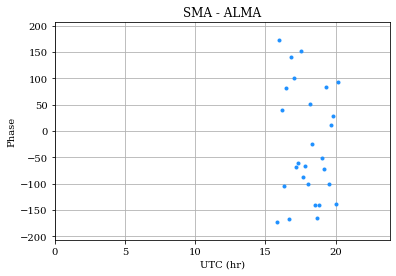

In [29]:
obs.plotall('u','v', conj=True)
obs.plotall('uvdist','amp') 
obs.plot_bl('SMA','ALMA','phase') 

In [27]:
obs.plotall('uvdist','phase') 


NameError: name 'obs' is not defined

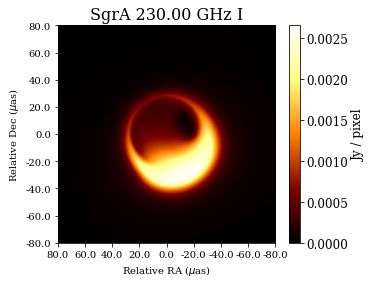

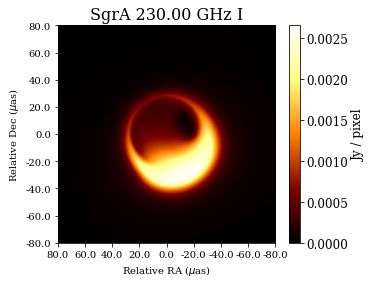

In [30]:
rotated_im = im.rotate(2)
rotated_im.display()

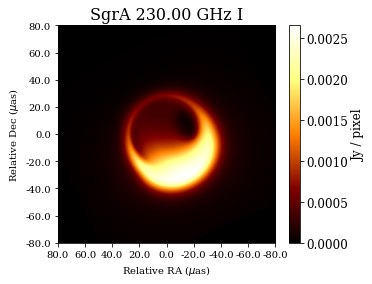

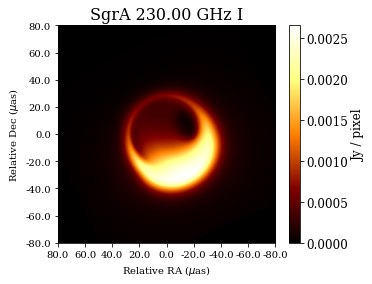

In [92]:
rotated_im = im.rotate(2, interp='linear')
rotated_im.display()

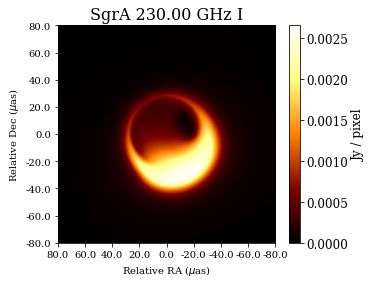

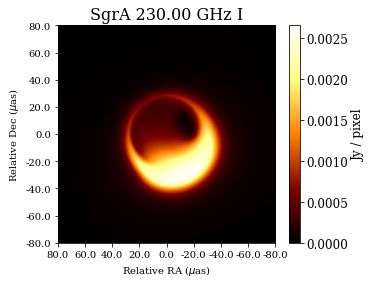

In [93]:
rotated_im = im.rotate(2, interp='cubic')
rotated_im.display()

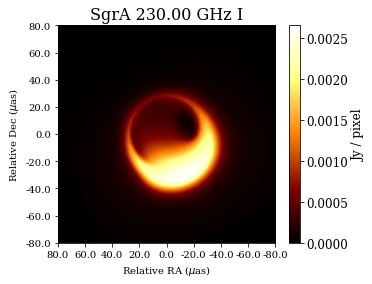

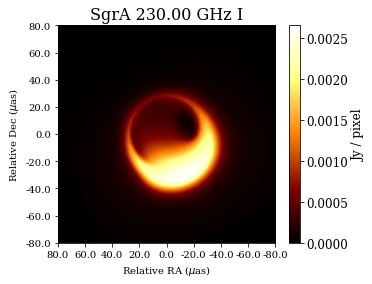

In [94]:
rotated_im = im.rotate(2, interp='quintic')
rotated_im.display()

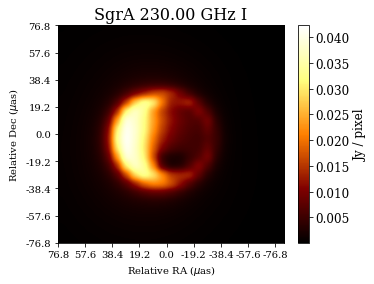

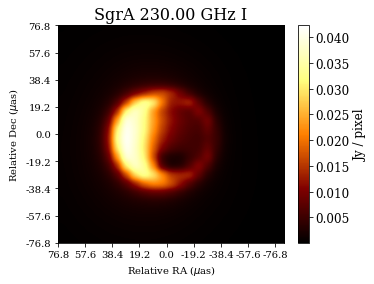

In [100]:
resampled_im = im.resample_square(25)
resampled_im.display()

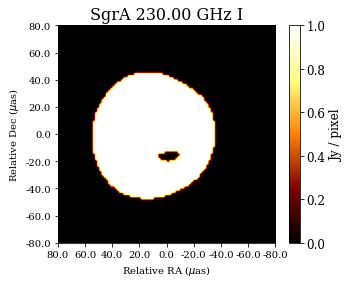

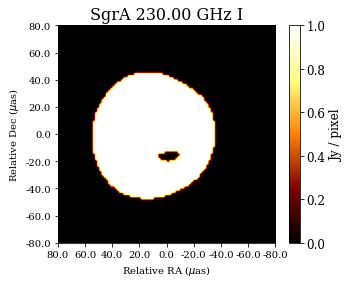

In [71]:
new_im = im.mask(0.05)
new_im.display()

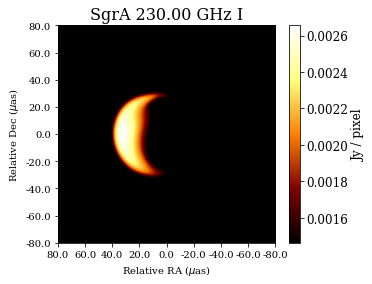

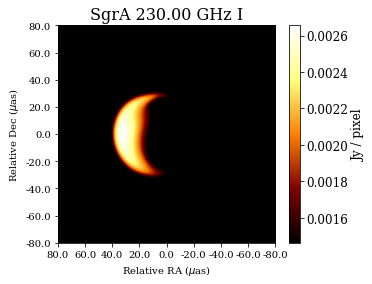

In [85]:
new_im = im.threshold(0.55)
new_im.display()

# Generate dataset with avery_sgra_eofn base image

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import ehtim as eh
from   ehtim.calibrating import self_cal as sc

import random

In [9]:
# Constants
eht = eh.array.load_txt('../arrays/EHT2017.txt')

tint_sec = 5
tadv_sec = 600
tstart_hr = 0
tstop_hr = 24
bw_hz = 4e9

In [11]:
x_train, y_train = [], []
n = 10

for i in range(n):
    im = eh.image.load_txt('../models/avery_sgra_eofn.txt')
    
    shift = [random.randint(-10, 10), random.randint(-10, 10)]
    rotation = random.random() * 10
    
    new_im = im.shift(shift).rotate(rotation)

    im_obs = new_im.observe(eht, tint_sec, tadv_sec, tstart_hr, tstop_hr, bw_hz,
                            ttype='fast', sgrscat=False, ampcal=True, phasecal=False)
    
    x_train.append(im_obs)
    y_train.append(new_im)

Loading text image:  ../models/avery_sgra_eofn.txt
Generating empty observation file . . . 
Producing clean visibilities from image with fast FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
   Applying atmospheric phase corruption: phasecal-->False
Adding thermal noise to data . . . 
Loading text image:  ../models/avery_sgra_eofn.txt
Generating empty observation file . . . 
Producing clean visibilities from image with fast FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
   Applying atmospheric phase corruption: phasecal-->False
Adding thermal noise to data . . . 
Loading text image:  ../models/avery_sgra_eofn.txt
Generating empty observation file . . . 
Producing clean visibilities from image with fast FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
   Applying atmospheric phase corruption: phasecal-->False
Adding thermal noise to data . . . 
Loading text image:  ../models/

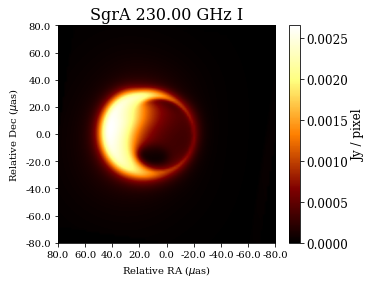

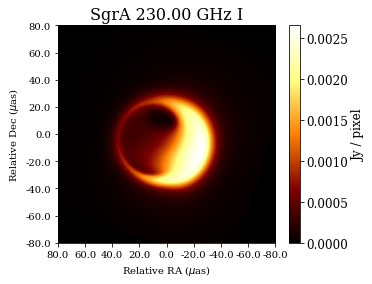

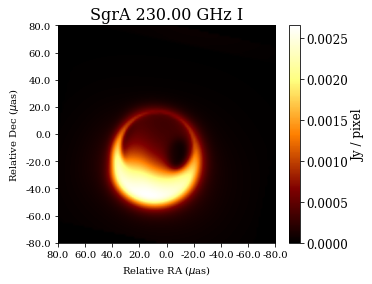

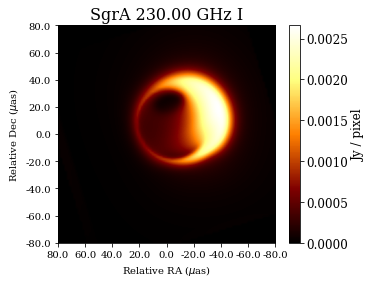

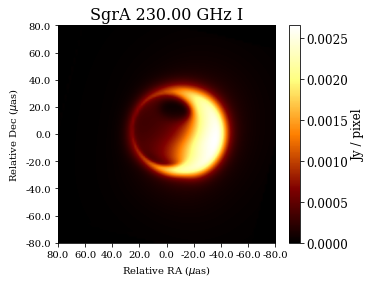

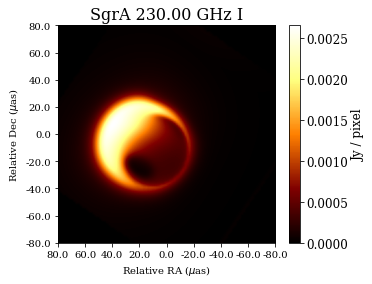

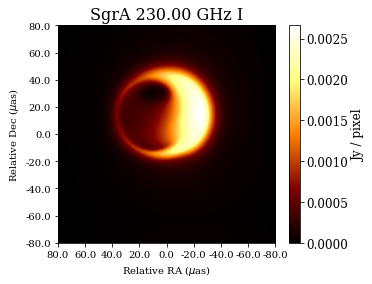

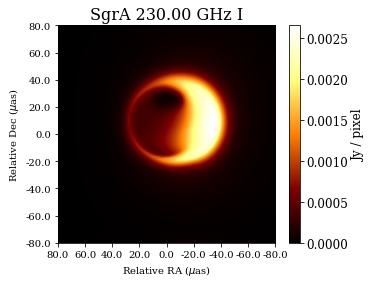

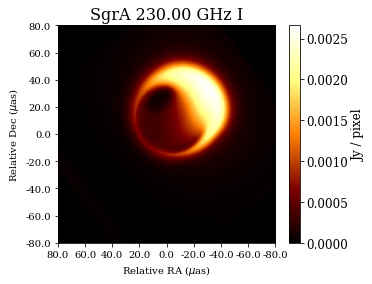

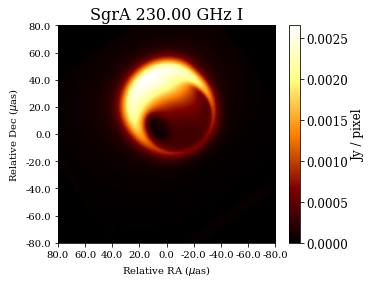

In [12]:
for im in y_train:
    im.display()

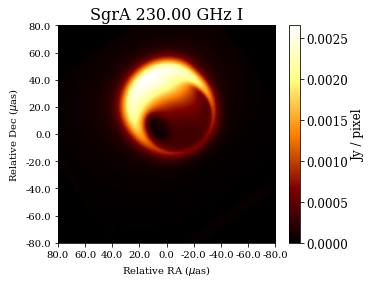

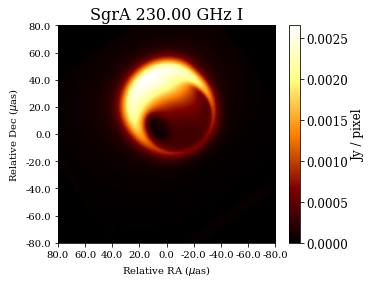

In [13]:
im.display()

In [17]:
im.imvec = np.random.normal(size=im.imvec.shape[0])

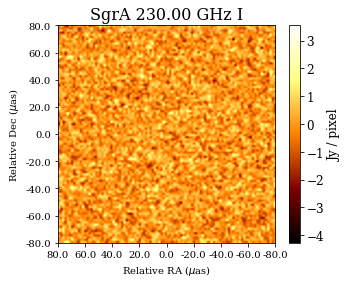

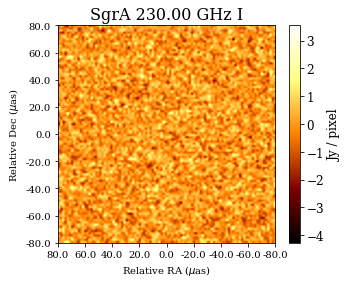

In [18]:
im.display()

In [19]:
im.xdim

100

In [20]:
im.ydim

100

In [21]:
im.ra

17.761122472222223

In [22]:
im.dec

-28.992189444444445

In [23]:
im.save_fits("temp_img.fits")

In [25]:
im_new = eh.image.load_fits("temp_img.fits")

Loading fits image:  temp_img.fits


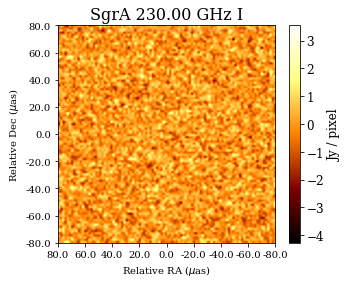

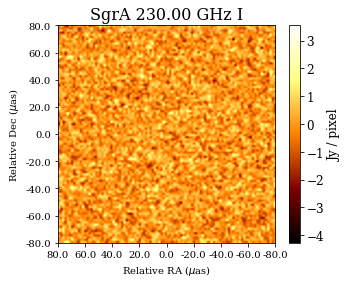

In [26]:
im_new.display()

In [ ]:
"""
- Normalize sum of all pixels = 1
- If things aren't working try multiplying initial image in loss 


--> first normalize so sum is 100x100
- first layers should be dense
- then conv layers

- use mnist

- save img and obs for each pair
"""